<a href="https://colab.research.google.com/github/faridaarum/Unsupervised_Learning/blob/main/Case_Based_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASED BASED - 1 (UNSUPERVISED LEARNING)

In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split


In [2]:
#import data set 
df = pd.read_csv("https://github.com/faridaarum/Unsupervised_Learning/blob/main/audit_risk.csv?raw=true")
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [4]:
df.describe()
#digunakan untuk menampilkan statistik deskriptif dari data frame atau series. Output dari fungsi ini berisi rangkuman central tendency dan sebaran dari dataset.

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [5]:
df.corr(method='pearson', min_periods=1)
#Hitung korelasi berpasangan kolom

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.216824,-0.425198,-0.219025,-0.132670,-0.218967,-0.130589,-0.153316,-0.151840,-0.170404,...,-0.128546,-0.114798,-0.136900,-0.103223,-0.337326,-0.173278,-0.154950,NaN,-0.091954,-0.394131
PARA_A,-0.216824,1.000000,0.496680,0.999267,0.161940,0.358550,0.161834,0.267042,0.133786,0.140648,...,0.118941,0.118279,0.172635,0.103981,0.426659,0.481859,0.149198,NaN,0.219759,0.378758
Score_A,-0.425198,0.496680,1.000000,0.504878,0.249438,0.572655,0.248188,0.297547,0.242692,0.274594,...,0.102677,0.177932,0.265322,0.150925,0.720488,0.320920,0.170872,NaN,0.201847,0.619726
Risk_A,-0.219025,0.999267,0.504878,1.000000,0.165287,0.362971,0.165143,0.270223,0.135613,0.143103,...,0.118641,0.121132,0.176159,0.106561,0.432505,0.483291,0.150778,NaN,0.221581,0.385067
PARA_B,-0.132670,0.161940,0.249438,0.165287,1.000000,0.347568,0.999936,0.994100,0.209855,0.230851,...,0.079393,0.203582,0.316541,0.196048,0.397155,0.654453,0.186709,NaN,0.887794,0.257029
Score_B,-0.218967,0.358550,0.572655,0.362971,0.347568,1.000000,0.348152,0.379336,0.277576,0.313798,...,0.015324,0.200841,0.309505,0.171271,0.901276,0.365662,0.127827,NaN,0.207975,0.635768
Risk_B,-0.130589,0.161834,0.248188,0.165143,0.999936,0.348152,1.000000,0.994023,0.209596,0.230547,...,0.079731,0.202823,0.316375,0.195292,0.396947,0.654505,0.186409,NaN,0.887570,0.255286
TOTAL,-0.153316,0.267042,0.297547,0.270223,0.994100,0.379336,0.994023,1.000000,0.217641,0.238237,...,0.089204,0.210752,0.326396,0.202159,0.433828,0.689772,0.197319,NaN,0.888096,0.292022
numbers,-0.151840,0.133786,0.242692,0.135613,0.209855,0.277576,0.209596,0.217641,1.000000,0.908140,...,0.136956,0.202327,0.209598,0.202385,0.502827,0.271115,0.228657,NaN,0.221461,0.308141
Score_B.1,-0.170404,0.140648,0.274594,0.143103,0.230851,0.313798,0.230547,0.238237,0.908140,1.000000,...,0.157595,0.226177,0.248423,0.223343,0.565976,0.308543,0.256551,NaN,0.259737,0.353803


[]

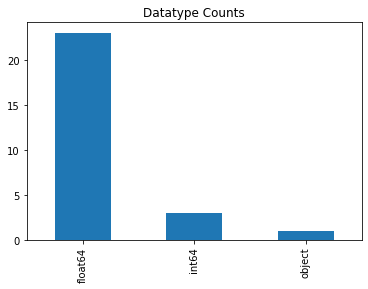

In [6]:
Type = df.dtypes.value_counts()
Type = Type.plot.bar()
Type.set_title("Datatype Counts")
Type.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


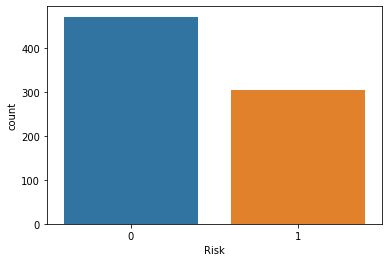

In [7]:
sns.countplot(df['Risk'], label = "Count")

CHECK MISSING VALUES 


In [8]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

Prepocessing Data

In [9]:
df.dtypes[:20]

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
Score_A          float64
Risk_A           float64
PARA_B           float64
Score_B          float64
Risk_B           float64
TOTAL            float64
numbers          float64
Score_B.1        float64
Risk_C           float64
Money_Value      float64
Score_MV         float64
Risk_D           float64
District_Loss      int64
PROB             float64
RiSk_E           float64
History            int64
Prob             float64
dtype: object

In [10]:
df["Money_Value"].fillna(df['Money_Value'].mean(), inplace = True)

In [11]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [12]:
df.drop(['PARA_B', 'Risk_B','TOTAL','Money_Value','Risk_D','Score_B.1','Score_MV','Risk_F','Audit_Risk'], axis=1)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,Score_B,numbers,Risk_C,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Risk
0,3.89,23,4.18,0.6,2.508,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.4,8.574,0.4,0.5,1
1,3.89,6,0.00,0.2,0.000,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.0,2.554,0.4,0.5,0
2,3.89,6,0.51,0.2,0.102,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.0,1.548,0.4,0.5,0
3,3.89,6,0.00,0.2,0.000,0.6,6.0,3.6,2,0.2,0.4,0,0.2,4.4,17.530,0.4,0.5,1
4,3.89,6,0.00,0.2,0.000,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.0,1.416,0.4,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.0,1.578,0.4,0.5,0
772,55.57,16,0.47,0.2,0.094,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.0,1.568,0.4,0.5,0
773,55.57,14,0.24,0.2,0.048,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.0,1.456,0.4,0.5,0
774,55.57,18,0.20,0.2,0.040,0.2,5.0,1.0,2,0.2,0.4,0,0.2,2.0,1.440,0.4,0.5,0


DATASPLIT AND SCALLING

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [15]:
x_train,x_test = np.asarray(x_train), np.asarray(x_test)
y_train,y_test = np.asarray(y_train), np.asarray(y_test)

In [16]:
x_train

array([[2.72, '11', 3.51, ..., 0.4, 0.5, 7.2184],
       [55.57, '14', 1.48, ..., 0.4, 0.5, 0.936],
       [1.85, '19', 1.16, ..., 1.2, 0.5, 1.6116],
       ...,
       [2.72, '19', 0.85, ..., 0.4, 0.5, 0.314],
       [3.41, '29', 1.1, ..., 0.4, 0.5, 15.2516],
       [55.57, '12', 0.9, ..., 0.4, 0.5, 0.4048]], dtype=object)

In [17]:
y_train

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [18]:
model =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(17, activation='softmax')
])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

TRAINING MODEL DATA

In [21]:
model.fit(x_train,y_train,epochs=100,batch_size=32)
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

ValueError: ignored

TEST MODEL

In [ ]:
CreateModel.evaluate(x_train,y_train)

In [ ]:
predictions = CreateModel.predict(x_test)

In [ ]:
for prediction, y in zip(predictions, y_test):
  print(f"Prediction: {np.argmax(prediction)}, Hasil Y_Test :{y}")
